In [1]:
import numpy as np

In [2]:
import scipy.spatial

In [3]:
from matplotlib import pyplot as plt

In [4]:
import cwipc

In [5]:
pc = cwipc.cwipc_read("vrsmall/boxes.ply", 0)

[pcl::PLYReader] vrsmall/boxes.ply:25: property 'float32 focal' of element 'camera' is not handled
[pcl::PLYReader] vrsmall/boxes.ply:26: property 'float32 scalex' of element 'camera' is not handled
[pcl::PLYReader] vrsmall/boxes.ply:27: property 'float32 scaley' of element 'camera' is not handled
[pcl::PLYReader] vrsmall/boxes.ply:28: property 'float32 centerx' of element 'camera' is not handled
[pcl::PLYReader] vrsmall/boxes.ply:29: property 'float32 centery' of element 'camera' is not handled
[pcl::PLYReader] vrsmall/boxes.ply:32: property 'float32 k1' of element 'camera' is not handled
[pcl::PLYReader] vrsmall/boxes.ply:33: property 'float32 k2' of element 'camera' is not handled


In [6]:
# pc = cwipc.cwipc_read("genregtest03/genregtest03.ply", 0)

In [7]:
# pc = cwipc.cwipc_read("genregtest003/genregtest003.ply", 0)

In [8]:
pc_cam1 = cwipc.cwipc_tilefilter(pc, 1)
np_cam1 = np.ctypeslib.as_array(pc_cam1.get_points())

In [9]:
pc_cam2 = cwipc.cwipc_tilefilter(pc, 2)
np_cam2 = np.ctypeslib.as_array(pc_cam2.get_points())

In [10]:
pc_cam4 = cwipc.cwipc_tilefilter(pc, 4)
np_cam4 = np.ctypeslib.as_array(pc_cam4.get_points())

In [11]:
pc_cam8 = cwipc.cwipc_tilefilter(pc, 8)
np_cam8 = np.ctypeslib.as_array(pc_cam8.get_points())

In [12]:
xyz_cam1 = np_cam1[['x','y','z']]

In [13]:
xyz_cam2 = np_cam2[['x','y','z']]

In [14]:
xyz_cam4 = np_cam4[['x','y','z']]

In [15]:
xyz_cam8 = np_cam8[['x','y','z']]

In [16]:
points_cam1 = np.column_stack([xyz_cam1['x'],xyz_cam1['y'],xyz_cam1['z']])

In [17]:
points_cam2 = np.column_stack([xyz_cam2['x'],xyz_cam2['y'],xyz_cam2['z']])

In [18]:
points_cam4 = np.column_stack([xyz_cam4['x'],xyz_cam4['y'],xyz_cam4['z']])

In [19]:
points_cam8 = np.column_stack([xyz_cam8['x'],xyz_cam8['y'],xyz_cam8['z']])

In [20]:
tree_cam1 = scipy.spatial.KDTree(points_cam1)

In [21]:
tree_cam2 = scipy.spatial.KDTree(points_cam2)

In [22]:
tree_cam4 = scipy.spatial.KDTree(points_cam4)

In [23]:
tree_cam8 = scipy.spatial.KDTree(points_cam8)

In [24]:
dists_1to2, _ = tree_cam2.query(points_cam1)

In [25]:
dists_1to4, _ = tree_cam4.query(points_cam1)

In [26]:
dists_1to8, _ = tree_cam8.query(points_cam1)

In [27]:
dists_2to4, _ = tree_cam4.query(points_cam2)

In [28]:
dists_2to8, _ = tree_cam8.query(points_cam2)

In [29]:
dists_4to8, _ = tree_cam8.query(points_cam4)

In [42]:
histogram_1to2, edges_1to2 = np.histogram(dists_1to2, bins=400)
cumsum_1to2 = np.cumsum(histogram_1to2)

In [43]:
histogram_1to4, edges_1to4 = np.histogram(dists_1to4, bins=400)
cumsum_1to4 = np.cumsum(histogram_1to4)

In [44]:
histogram_1to8, edges_1to8 = np.histogram(dists_1to8, bins=400)
cumsum_1to8 = np.cumsum(histogram_1to8)

In [45]:
histogram_2to4, edges_2to4 = np.histogram(dists_2to4, bins=400)
cumsum_2to4 = np.cumsum(histogram_2to4)

In [46]:
histogram_2to8, edges_2to8 = np.histogram(dists_2to8, bins=400)
cumsum_2to8 = np.cumsum(histogram_2to8)

In [47]:
histogram_4to8, edges_4to8 = np.histogram(dists_4to8, bins=400)
cumsum_4to8 = np.cumsum(histogram_4to8)

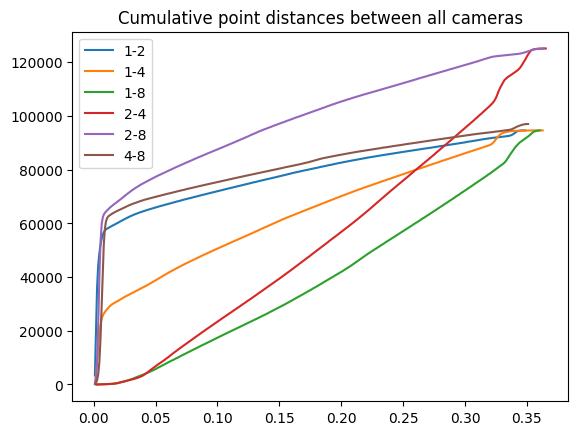

In [50]:
plt.plot(edges_1to2[1:], cumsum_1to2, label="1-2")
plt.plot(edges_1to4[1:], cumsum_1to4, label="1-4")
plt.plot(edges_1to8[1:], cumsum_1to8, label="1-8")
plt.plot(edges_2to4[1:], cumsum_2to4, label="2-4")
plt.plot(edges_2to8[1:], cumsum_2to8, label="2-8")
plt.plot(edges_4to8[1:], cumsum_4to8, label="4-8")
plt.title("Cumulative point distances between all cameras")
plt.legend()
plt.savefig("cumdist.png")
plt.show()